<Figure size 432x288 with 0 Axes>

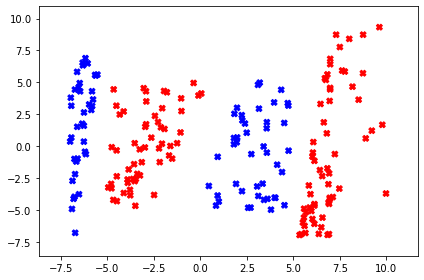

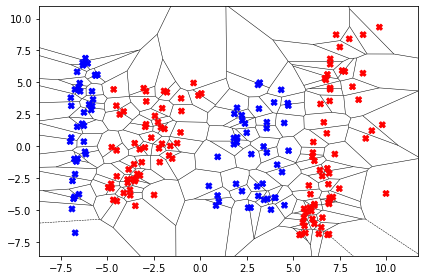

In [4]:
import hw3_utils as utils
#import matplotlib.pyplot as plt
#import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
#import torch.optim as optim



class Block(nn.Module):
    """A basic block used to build ResNet."""

    def __init__(self, num_channels):
        """Initialize a building block for ResNet.

        Argument:
            num_channels: the number of channels of the input to Block, and is also
                          the number of channels of conv layers of Block.
        """
        super(Block, self).__init__()
        self.Conv2d = nn.Conv2d(num_channels, num_channels, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.Batch = nn.BatchNorm2d(num_channels)
        self.Relu = nn.ReLU()
        self.Conv2d2 = nn.Conv2d(num_channels, num_channels, kernel_size = 3, stride = 1, padding = 1, bias = False)
        self.Batch2 = nn.BatchNorm2d(num_channels) 

    def forward(self, x):
        """
        The input will have shape (N, num_channels, H, W),
        where N is the batch size, and H and W give the shape of each channel.

        The output should have the same shape as input.
        """
        return self.Relu(x + self.Batch2(self.Conv2d2(self.Relu(self.Batch(self.Conv2d(x)))))) #Batch2 대신에 Batch 쓰면 같은 셋팅의 layer를 쓰기때문에 문제?
        #1(b): batch normalization already has bias terms inside. 

class ResNet(nn.Module):
    """A simplified ResNet."""

    def __init__(self, num_channels, num_classes=10):
        """Initialize a shallow ResNet.

        Arguments:
            num_channels: the number of output channels of the conv layer
                          before the building block, and also 
                          the number of channels of the building block.
            num_classes: the number of output units.
        """
        super(ResNet, self).__init__()
        self.Conv2d = nn.Conv2d(1,num_channels,3,2,1,bias=False)
        self.Batch = nn.BatchNorm2d(num_channels)
        self.Relu = nn.ReLU()
        self.Maxpool = nn.MaxPool2d(2)
        self.Block = Block(num_channels)
        self.AdaptiveAvgPool2d = nn.AdaptiveAvgPool2d((1, 1))
        self.linear = nn.Linear(num_channels, 10) #num_channels is not N. It's dimension of training example

    def forward(self, x):
        """
        The input will have shape (N, 1, H, W),
        where N is the batch size, and H and W give the shape of each channel.

        The output should have shape (N, 10).
        """
        print("x shape is", x.shape)
        print("N is", x.shape[0])
        temp = self.AdaptiveAvgPool2d(self.Block(self.Maxpool(self.Relu(self.Batch(self.Conv2d(x))))))
        print(temp.shape)
        print(temp.size(0))
        return self.linear(temp.view(temp.size(0), -1))

# m = nn.AdaptiveAvgPool2d((None, 7))
# input = torch.randn(1, 64, 10, 9)
# print(input.size(1))
# output = m(input)
# print(output.shape)

##### nearest neighbor problem ###
        
        
def one_nearest_neighbor(X,Y,X_test):
        
    # return labels for X_test as torch tensor
    print("check")
    ans = torch.empty(X_test.shape[0])
    # train = []
    for i in range (X_test.shape[0]):
        minn = 9999999.9
        for j in range (X.shape[0]):
            dist = torch.dist(X[j,:], X_test[i,:])
            if minn > dist:
                minn = dist
                idx = Y[j]
        ans[i] = idx
    print(len(ans), X_test.shape)
    print(Y)
    print(ans)
    return ans
X, Y = utils.load_one_nearest_neighbor_data()
utils.voronoi_plot(X,Y)